<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/06_tree_vs_random_forest_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree vs Random Forest

Goal:
- Visualize nonlinear decision boundaries
- Compare tree instability
- Observe variance reduction in Random Forest


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

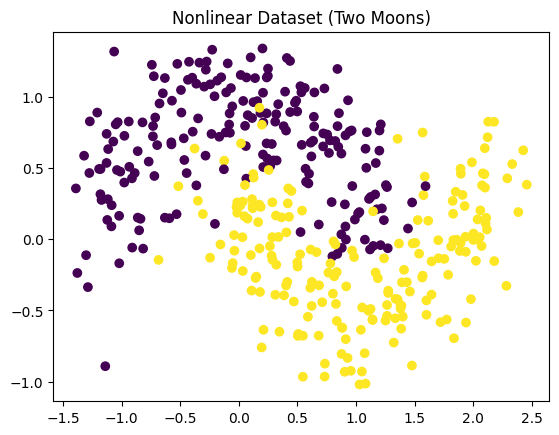

In [2]:
X, y = make_moons(n_samples=400, noise=0.25, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Nonlinear Dataset (Two Moons)")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(max_depth=None)
rf_model = RandomForestClassifier(n_estimators=200)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

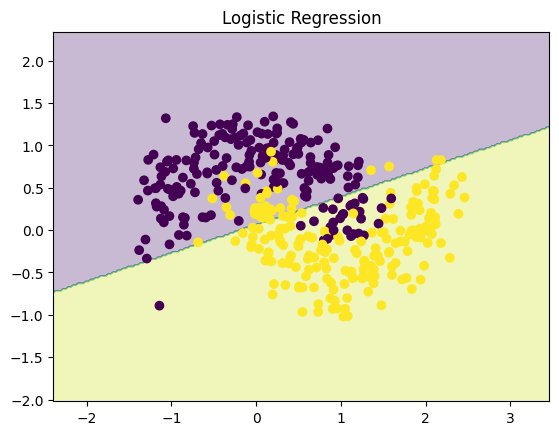

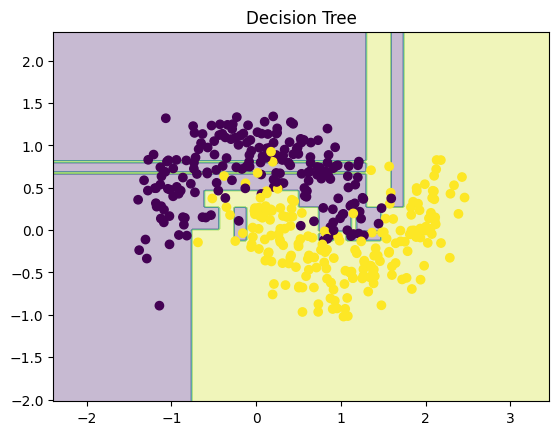

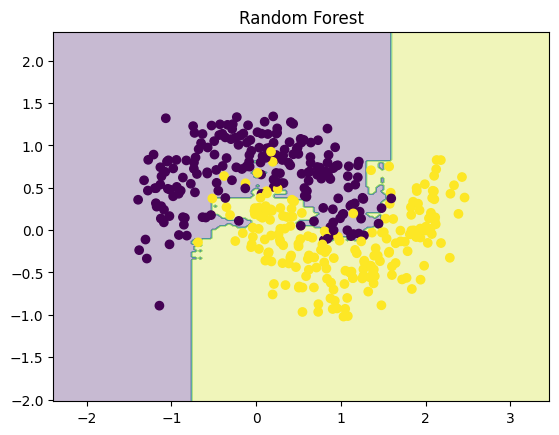

In [5]:
def plot_boundary(model, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.show()

plot_boundary(log_model, "Logistic Regression")
plot_boundary(tree_model, "Decision Tree")
plot_boundary(rf_model, "Random Forest")

Observations:

Logistic Regression:
- Linear boundary
- Cannot capture curved separation

Decision Tree:
- Highly irregular boundary
- Overfits training data

Random Forest:
- Smooth nonlinear boundary
- More stable than single tree
